![logo](MAXWind_Logo.png "MAXWind logo")
https://www.owi-lab.be/maxwind

# UGent
## Exercise 1: Corrosion pit modelling

This exercise will introduce to you the approach to the modelling of pitting corrosion in structural steel (S355) exposed to the North Sea environment. Corrosion pits form and grow as a consequence of electrochemical reactions (in a corrosive environment) where a wide-range of parameters play a role. A phase-field framework coupled with smoothed boundary method is employed to simulate this phenomenon which accounts for most of the effective parameters.



In [6]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

### 1. Input Parameters (Material and environmental)
The following table represents the material and environmental parameters that are needed to feed the computational tool. 

In [7]:
#Input material parameters as a Pandas DataFrame.

material_prm_df = pd.read_excel("Material_Parameters_grouped.xlsx")  

#Show material parameters
material_prm_df

,Parameter group,Parameter,Reference,Value
0,Phase-field model,Double well height,N.A.,1.000000e+00
1,Phase-field model,Overlapping penalty coefficient,N.A.,1.500000e+00
2,Phase-field model,Gradient energy coefficient,N.A.,1.000000e-11
3,Electrochemical (obtained experimentally),Corrosion current density,Obtained from Tafel test,1.534000e-01
4,Electrochemical (obtained experimentally),Corrosion potential,Obtained from Tafel test,-7.110000e-01
5,Electrochemical (obtained experimentally),Constant beta (charge transfer symmetry factor),Obtained from Tafel test,1.700000e-01
6,Alloy specific,Metal cation molar volume,CRC handbook,7.090000e-06
7,Alloy specific,Metal cation charge number,CRC handbook,2.000000e+00
8,Alloy specific,Metal cation diffusivity,CRC handbook,6.895700e-10
9,Alloy specific,Metal cation saturation concentration,Isaacs et al.,4.400000e+03


---

### 2. Demonstration of pit modelling

To demonstrate the outpuot of pit modelling, we have chosen to showcase the results for two variations in variables specific to the corrosive environment. Specifically, the "applied potential" is altered.

In [8]:
#Show environment specific variables
material_prm_df[material_prm_df['Parameter group']=="Environment specific variables"]

,Parameter group,Parameter,Reference,Value
15,Environment specific variables,Temperature,N.A.,298.15
16,Environment specific variables,Applied potential 1st Sim.,N.A.,-0.50
17,Environment specific variables,Applied potential 2nd sim.,N.A.,-0.45


---

#### 2.1 Adaptive meshing

To limit excessive computational costs, adaptive meshing is used to update the mesh with the evolution of the corrosion pit. 

In the animation below, it can be seen that the mesh density constantly changes with the evolution of the corrosion pit front.

![gif](Mesh-gif.gif "adaptive_mesh")

---

#### 2.2 Pit evolution(s)

Using the two different applied potentials, two corrosion pit evolutions are generated (for a simulation time of 150 seconds).

##### Applied potential = -0.500 V
![neg_500mV](-500mV-gif.gif "neg_500mV")

##### Applied potential = -0.450 V
![neg_450mV](-450mV-gif.gif "neg_450mV")

---

#### Pit geometry evolution

Let us now look at the effect of applied potential on corrosion pit growth

![pit_size](pit_size.png "pit_size")

In [16]:
#Input pit growth data as Pandas DataFrame into a dictionary of a range of applied potentials
pit_evolution_df_dict = {}
list_app_potential = ['-0.45 V', '-0.5 V']

for potential in list_app_potential:
    pit_evolution_df_dict[potential] = pd.read_excel("RESULTS_"+potential+".xlsx")

#Show DataFrame
#Headers
#Simulation time [sec]
#pit width (for the two applied potentials) [mm]
#pit depth (for the two applied potentials) [mm]
pit_evolution_df_dict

{'-0.45 V':      Simulation time  pit width  pit depth
 0                0.0   0.058594   0.029297
 1                1.5   0.064453   0.030762
 2                3.0   0.067383   0.030762
 3                4.5   0.073242   0.032227
 4                6.0   0.076172   0.033691
 ..               ...        ...        ...
 96             144.0   0.550781   0.096680
 97             145.5   0.556641   0.098145
 98             147.0   0.559571   0.098145
 99             148.5   0.565430   0.098145
 100            150.0   0.571289   0.099609
 
 [101 rows x 3 columns],
 '-0.5 V':      Simulation time  pit width  pit depth
 0                0.0   0.058594   0.029297
 1                1.5   0.061523   0.029297
 2                3.0   0.064453   0.030762
 3                4.5   0.067383   0.030762
 4                6.0   0.070313   0.032227
 ..               ...        ...        ...
 96             144.0   0.383789   0.082031
 97             145.5   0.386719   0.082031
 98             147.0   0.38

---

#### Plot pit width and depth evolution

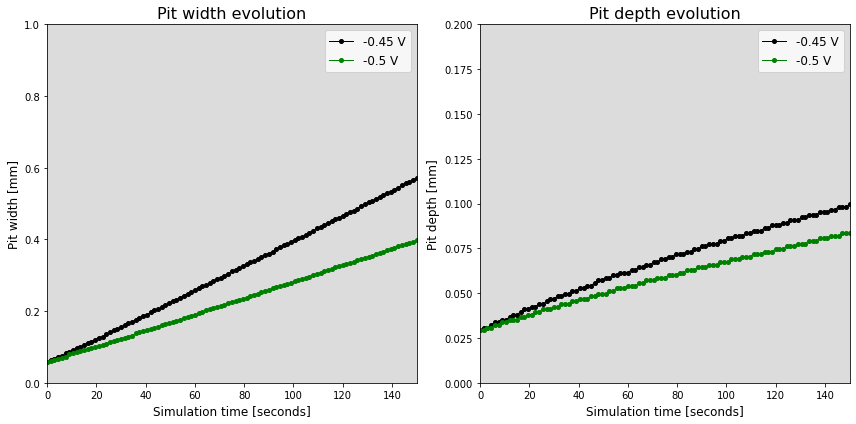

In [21]:
# COSMETIC: list of colours to iterate through.
colours_width = itertools.cycle(('black','green','red','cyan','magenta','yellow','blue'))
colours_depth = itertools.cycle(('black','green','red','cyan','magenta','yellow','blue'))

fig, ax = plt.subplots(1,2,figsize=(12,6))

# #Plot Pit width evolution
for potential in list_app_potential:
    ax[0].plot(pit_evolution_df_dict[potential]['Simulation time'],pit_evolution_df_dict[potential]['pit width'],color=next(colours_width), marker = 'o', markersize=4, lw=1, label=potential)
ax[0].legend(loc='best', fontsize = 12) #location of legend 
ax[0].set_xlabel('Simulation time [seconds]',size=12)
ax[0].set_ylabel('Pit width [mm]',size=12) 
ax[0].set_title('Pit width evolution', size = 16)
ax[0].set_ylim([0.,1.0])
ax[0].set_xlim([0.0,150.0])
ax[0].set_facecolor('gainsboro')

# #Plot Pit depth evolution
for potential in list_app_potential:
    ax[1].plot(pit_evolution_df_dict[potential]['Simulation time'],pit_evolution_df_dict[potential]['pit depth'],color=next(colours_depth), marker = 'o', markersize=4, lw=1, label=potential)
ax[1].legend(loc='best', fontsize = 12) #location of legend 
ax[1].set_xlabel('Simulation time [seconds]',size=12)
ax[1].set_ylabel('Pit depth [mm]',size=12) 
ax[1].set_title('Pit depth evolution', size = 16)
ax[1].set_ylim([0.,0.2])
ax[1].set_xlim([0.0,150.0])
ax[1].set_facecolor('gainsboro')
plt.tight_layout()

#### You can try plotting pits more applied potentials

Options - 
1. -0.4 V
2. -0.45 V (plotted above)
3. -0.5 V (plotted above)
4. -0.55 V
5. -0.6 V


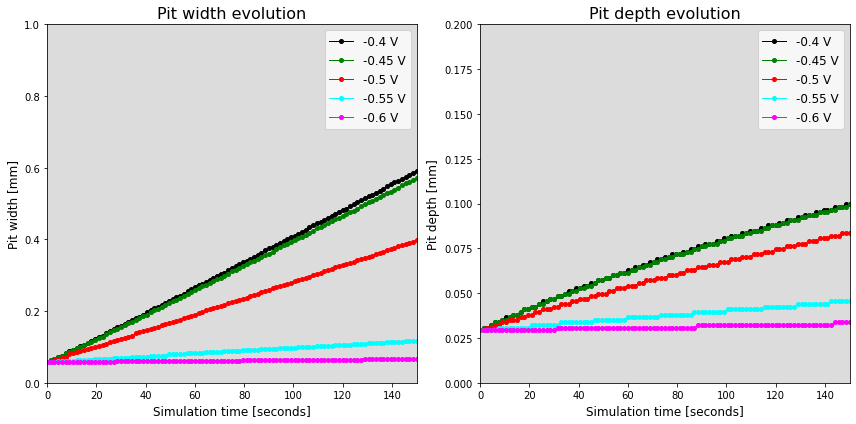

In [23]:
# COSMETIC: list of colours to iterate through.
colours_width = itertools.cycle(('black','green','red','cyan','magenta','yellow','blue'))
colours_depth = itertools.cycle(('black','green','red','cyan','magenta','yellow','blue'))

#Choose list of applied potentials to plot
list_app_potential = ['-0.4 V', '-0.45 V', '-0.5 V', '-0.55 V', '-0.6 V'] ##your choice

#Input pit growth data as Pandas DataFrame into a dictionary of a range of applied potentials
pit_evolution_df_dict = {}

for potential in list_app_potential:
    pit_evolution_df_dict[potential] = pd.read_excel("RESULTS_"+potential+".xlsx")

fig, ax = plt.subplots(1,2,figsize=(12,6))
# #Plot Pit width evolution
for potential in list_app_potential:
    ax[0].plot(pit_evolution_df_dict[potential]['Simulation time'],pit_evolution_df_dict[potential]['pit width'],color=next(colours_width), marker = 'o', markersize=4, lw=1, label=potential)
ax[0].legend(loc='best', fontsize = 12) #location of legend 
ax[0].set_xlabel('Simulation time [seconds]',size=12)
ax[0].set_ylabel('Pit width [mm]',size=12) 
ax[0].set_title('Pit width evolution', size = 16)
ax[0].set_ylim([0.,1.0])
ax[0].set_xlim([0.0,150.0])
ax[0].set_facecolor('gainsboro')

# #Plot Pit depth evolution
for potential in list_app_potential:
    ax[1].plot(pit_evolution_df_dict[potential]['Simulation time'],pit_evolution_df_dict[potential]['pit depth'],color=next(colours_depth), marker = 'o', markersize=4, lw=1, label=potential)
ax[1].legend(loc='best', fontsize = 12) #location of legend 
ax[1].set_xlabel('Simulation time [seconds]',size=12)
ax[1].set_ylabel('Pit depth [mm]',size=12) 
ax[1].set_title('Pit depth evolution', size = 16)
ax[1].set_ylim([0.,0.2])
ax[1].set_xlim([0.0,150.0])
ax[1].set_facecolor('gainsboro')
plt.tight_layout()